# Proyecto Analítica de venta de videojuegos

## Tabla de contenido

1. Introducción del Proyecto
2. Objetivos específicos
3. Etapas de análisis del proyecto
4. Inicialización
5. Cargar y explorar los datos
6. Preparar los datos
7. Análisis de los datos
8. Perfil de usuario para cada región
9. Prueba de hipótesis
10. Conclusión general del Proyecto

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Objetivos específicos

1. Identificar las plataformas de videojuegos más rentables y su evolución a lo largo del tiempo: Esto incluye analizar las tendencias de ventas en diferentes plataformas, identificando aquellas que solían ser populares y las que actualmente dominan el mercado.

2. Evaluar la influencia de las reseñas de usuarios y expertos en las ventas de videojuegos: Se explorará cómo las calificaciones afectan las ventas en diferentes plataformas, utilizando análisis de correlación y gráficos de dispersión.

3. Analizar la distribución de ventas por género y región: Se estudiarán las diferencias en las preferencias de los usuarios según el género del juego y la región geográfica (NA, UE, JP), así como la influencia de la clasificación ESRB en las ventas de cada región.

## Etapas de análisis del proyecto

1. **Apertura y Exploración Inicial de los Datos**

    . **Carga del Dataset:** Abre el archivo /datasets/games.csv y realiza una exploración inicial para familiarizarte con la estructura de los datos.
    
    . **Revisión General de la Información:** Examina el contenido para comprender las columnas, el tipo de datos, y las características de las variables. Este paso permite identificar cualquier anomalía o dato ausente.

2. **Preparación y Limpieza de Datos**

    . **Estandarización de Columnas:** Reemplaza los nombres de las columnas poniéndolos en minúsculas para asegurar la consistencia.
    
    . **Conversión de Tipos de Datos:** Convierte las columnas a los tipos de datos apropiados (por ejemplo, convertir columnas de fechas o números que estén como texto).
    
    . **Tratamiento de Valores Ausentes:** Identifica y maneja los valores ausentes según corresponda. Esto puede incluir el llenado de valores faltantes, su eliminación o su mantenimiento dependiendo del análisis. Particularmente, se debe abordar cómo manejar la abreviatura "TBD" en la columna de puntajes de usuario.
   
    . **Cálculo de Ventas Totales:** Suma las ventas en todas las regiones para cada juego y almacena este valor en una nueva columna.

3. **Análisis de los Datos**

    . **Distribución Temporal de Lanzamientos:** Analiza cuántos juegos se lanzaron en diferentes años y determina si los datos son significativos en cada período.
   
    . **Evolución de Ventas por Plataforma:** Observa las variaciones de ventas entre plataformas a lo largo de los años, identificando plataformas con mayores ventas, aquellas en declive, y el tiempo que tardan en emerger o desaparecer las plataformas.
   
    . **Selección del Período Relevante:** Con base en los análisis anteriores, decide qué período de datos utilizar para construir un modelo para 2017. Excluye datos que no sean relevantes para este análisis.
   
    . **Evaluación de las Plataformas Líderes:** Identifica las plataformas con las mayores ventas, aquellas en crecimiento o en declive, y selecciona plataformas potencialmente rentables para análisis adicionales.
   
    . **Visualización de Ventas:** Crea diagramas de caja para comparar las ventas globales de juegos por plataforma y analiza las diferencias significativas entre ellas.
    
    . **Impacto de las Reseñas en las Ventas:** Analiza cómo las reseñas de usuarios y críticos afectan las ventas de una plataforma seleccionada, utilizando gráficos de dispersión y calculando la correlación entre estas variables.

4. **Análisis Regional y Perfil de Usuario**

    .   **Plataformas y Géneros por Región:** Para cada región (NA, UE, JP), identifica las cinco principales plataformas y géneros, describiendo las diferencias y variaciones en las cuotas de mercado.
    
    . **Impacto de las Clasificaciones ESRB:** Evalúa si las clasificaciones de ESRB influyen en las ventas en cada región específica.

5.  **Pruebas de Hipótesis**

    . **Formulación y Prueba de Hipótesis:** Prueba las hipótesis relacionadas con las calificaciones de usuarios entre plataformas (Xbox One vs. PC) y géneros (Acción vs. Deportes), definiendo un valor alfa para determinar la significancia estadística.
   
    . **Explicación del Proceso de Prueba:** Detalla cómo se formularon las hipótesis nula y alternativa, así como los criterios utilizados para realizar la prueba.

6. Conclusión General

    . **Documentación del Proyecto:** Escribe una conclusión que resuma los hallazgos clave del análisis y las implicaciones para la planificación de futuras campañas. Asegúrate de presentar el informe en un Jupyter Notebook, con el código y las explicaciones claramente separadas y bien formateadas.

In [ ]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats as st
import numpy as np
import math
import seaborn as sns


In [ ]:
# Cargar todos los dataset
df_games = pd.read_csv('/datasets/games.csv')

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Prepara los datos

* Reemplaza los nombres de las columnas (ponlos en minúsculas).

* Convierte los datos en los tipos necesarios.

* Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

* Si es necesario, elige la manera de tratar los valores ausentes:

     * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
     * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
     * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
     * Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [7]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).

df_games.columns = df_games.columns.str.lower()

In [8]:
 #Cambie el nombre de la columna para que sea más claro a que nombre se refiere.
    
df_games.rename(columns={'name':'games_name'}, inplace=True)

In [9]:
# Convertir las columnas a tipo float

df_games['critic_score'] = pd.to_numeric(df_games['critic_score'], errors='coerce')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Verifica los tipos de datos después de la conversión
print(df_games[['critic_score', 'user_score']].dtypes)

critic_score    float64
user_score      float64
dtype: object


In [10]:
#Cantudad de valores faltantes en la tabla de datos.

missing_values = df_games.isnull().sum()
print(missing_values)

games_name            2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [11]:
#muestra en que año fue lanzado el 1er juego y en que año finalizaron sus lanzamientos, el periodo inicia en 1980 y finaliza el año 2016.

print(df_games['year_of_release'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [12]:
#Muestra del DataFrame con los cambios aplicados, tanto tipo de dato, mayusculas, y cambio de nombre en columnas como name a games_name.

df_games.info()
df_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   games_name       16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [13]:
#verificación de duplicados.

duplicated_rows = df_games.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")


Número de filas duplicadas: 0


In [14]:
#valores únicos de la columna 'platform'

print(df_games['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [15]:
#converti 'platform' de columna de string a columna categórica usando el método astype()

df_games['platform'] = df_games['platform'].astype('category')
print(df_games['platform'].head())

0    Wii
1    NES
2    Wii
3    Wii
4     GB
Name: platform, dtype: category
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']


In [16]:
# Cambiar 'TBD' a NaN en la columna 'user_score' ya que tener la abreviatura significa lo mismo que un valor ausente, no cuento con la informacion.

print(df_games['user_score'].unique())

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [17]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)


In [18]:
print(df_games['user_score'].isnull().sum()) #total de valores nulos en la columna user_score.

9125


In [19]:
print(df_games['user_score'].unique()) #Se ha modificado la abreviatura tbd a nan.

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [20]:
#porcentaje de valores ausentes, las columnas de critic_score 51.319174 y user_score 54.591684 presentan un 50% de valores ausentes, puede que algunos juegos no fueran evaluados..


missing_data = df_games.isnull().mean() * 100
print(missing_data)

games_name          0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


In [22]:
# Rellenar valores nulos en 'critic_score' y 'user_score' con la mediana

df_games['critic_score'].fillna(df_games['critic_score'].median(), inplace=True)
df_games['user_score'].fillna(df_games['user_score'].median(), inplace=True)


# Verifica si hay valores nulos restantes
print(df_games[['critic_score', 'user_score']].isnull().sum())

critic_score    0
user_score      0
dtype: int64


In [23]:
#porcentaje de valores ausentes, las columnas de critic_score 51.319174 y user_score 54.591684 presentan un 50% de valores ausentes, puede que algunos juegos no fueran evaluados..


missing_data = df_games.isnull().mean() * 100
print(missing_data)

games_name          0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.000000
user_score          0.000000
rating             40.478612
dtype: float64


In [24]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games= df_games.sort_values(by='total_sales', ascending=False)
print(df_games.head(10))
                                                                                 

                  games_name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77 

In [25]:
df_games['average_sales'] = (df_games['total_sales']) / 4

df_games= df_games.sort_values(by=['average_sales', 'total_sales'], ascending=False)

print(df_games.head(10))

                  games_name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77 

### Analiza los datos

* Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

* Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

* Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

* ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


In [26]:
#Ventas por plataforma

sales_by_platform = df_games.groupby('platform')['total_sales'].sum()
sales_by_platform

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

In [27]:
print(df_games['year_of_release'].min(), df_games['year_of_release'].max())

1980.0 2016.0


In [28]:
#Total de juegos lanzados en diferentes años.

games_per_year = df_games['year_of_release'].value_counts().sort_index()  

print(games_per_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


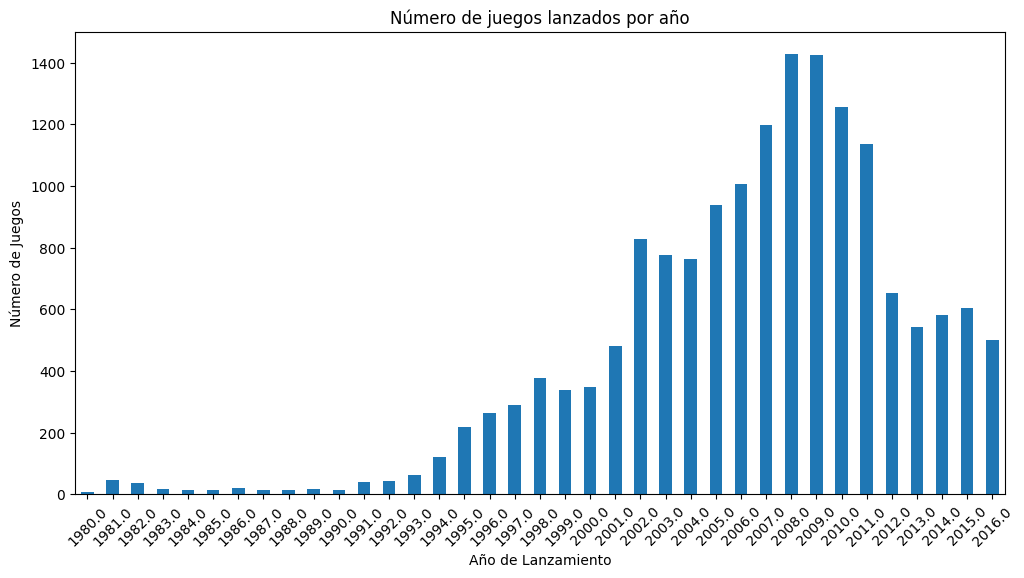

In [29]:
# Graficar el número de juegos lanzados por año

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.show()

In [30]:
#plataformas líderes en ventas

In [31]:
sales_by_platform = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

In [32]:
top_platforms = sales_by_platform.sort_values('total_sales', ascending=False).head(10)
print(top_platforms)

          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         583.84    339.29    139.20       193.44      1255.77
X360        602.47    270.76     12.43        85.76       971.42
PS3         393.49    330.29     80.19       135.68       939.65
Wii         496.90    262.21     69.33        79.07       907.51
DS          382.40    188.89    175.57        59.26       806.12
PS          336.52    213.61    139.82        40.91       730.86
GBA         187.54     75.25     47.33         7.73       317.85
PS4         108.74    141.09     15.96        48.35       314.14
PSP         109.17     66.68     76.78        41.42       294.05
PC           94.53    142.44      0.17        22.38       259.52


<Figure size 1200x600 with 0 Axes>

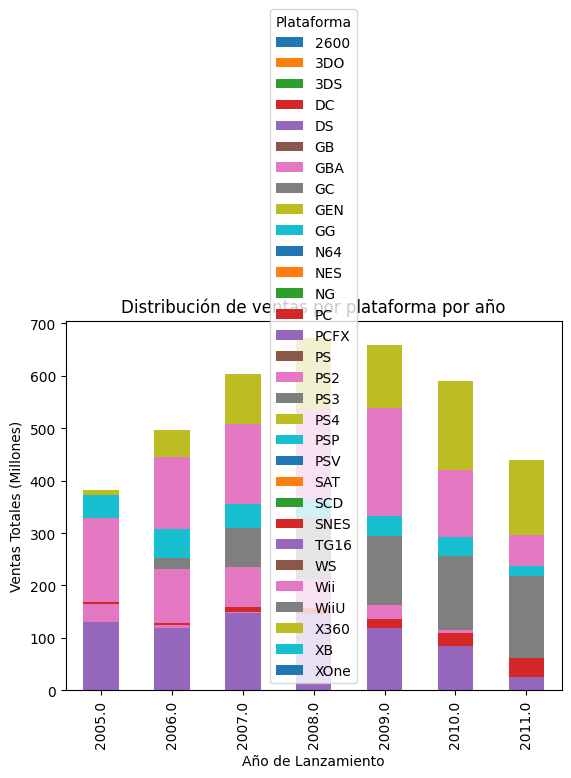

In [33]:
# Filtrar el dataframe para incluir solo las plataformas que estamos analizando

top_platforms_list = top_platforms.index.tolist()
df_top_platforms = df_games[df_games['platform'].isin(top_platforms_list)]

# Filtrar los datos para incluir solo los años entre 2005 y 2011
df_top_platforms = df_top_platforms[(df_top_platforms['year_of_release'] >= 2005) & (df_top_platforms['year_of_release'] <= 2011)]

# Crear una tabla dinámica para ventas por año y plataforma
sales_distribution = df_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Graficar la distribución de las ventas por plataforma
plt.figure(figsize=(12, 6))
sales_distribution.plot(kind='bar', stacked=True)
plt.title('Distribución de ventas por plataforma por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones)')
plt.legend(title='Plataforma')
plt.show()

In [34]:
# Mostrar plataformas que tenían ventas en el pasado pero no generan ventas actualmente

platforms_no_sales = df_games.groupby('platform').filter(lambda x: x['total_sales'].sum() > 0)
platforms_no_sales = platforms_no_sales.loc[platforms_no_sales['year_of_release'] >= 2010].groupby('platform')['total_sales'].sum()

# Filtrar plataformas sin ventas en años recientes

no_sales_recent = platforms_no_sales[platforms_no_sales == 0]
print(no_sales_recent)

platform
2600    0.0
3DO     0.0
DC      0.0
GB      0.0
GBA     0.0
GC      0.0
GEN     0.0
GG      0.0
N64     0.0
NES     0.0
NG      0.0
PCFX    0.0
PS      0.0
SAT     0.0
SCD     0.0
SNES    0.0
TG16    0.0
WS      0.0
XB      0.0
Name: total_sales, dtype: float64


In [35]:
# Encontrar el primer y último año de ventas por plataforma
first_last_year = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calcular el tiempo que tardan en desaparecer
first_last_year['lifespan'] = first_last_year['max'] - first_last_year['min']

# Mostrar plataformas con su tiempo de vida
print(first_last_year.sort_values('lifespan', ascending=False))

             min     max  lifespan
platform                          
PC        1985.0  2016.0      31.0
DS        1985.0  2013.0      28.0
GB        1988.0  2001.0      13.0
X360      2005.0  2016.0      11.0
PSP       2004.0  2015.0      11.0
PS2       2000.0  2011.0      11.0
NES       1983.0  1994.0      11.0
DC        1998.0  2008.0      10.0
Wii       2006.0  2016.0      10.0
PS3       2006.0  2016.0      10.0
2600      1980.0  1989.0       9.0
SNES      1990.0  1999.0       9.0
PS        1994.0  2003.0       9.0
XB        2000.0  2008.0       8.0
GBA       2000.0  2007.0       7.0
GC        2001.0  2007.0       6.0
N64       1996.0  2002.0       6.0
3DS       2011.0  2016.0       5.0
PSV       2011.0  2016.0       5.0
SAT       1994.0  1999.0       5.0
WiiU      2012.0  2016.0       4.0
GEN       1990.0  1994.0       4.0
NG        1993.0  1996.0       3.0
XOne      2013.0  2016.0       3.0
PS4       2013.0  2016.0       3.0
WS        1999.0  2001.0       2.0
3DO       1994.0  19

In [36]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

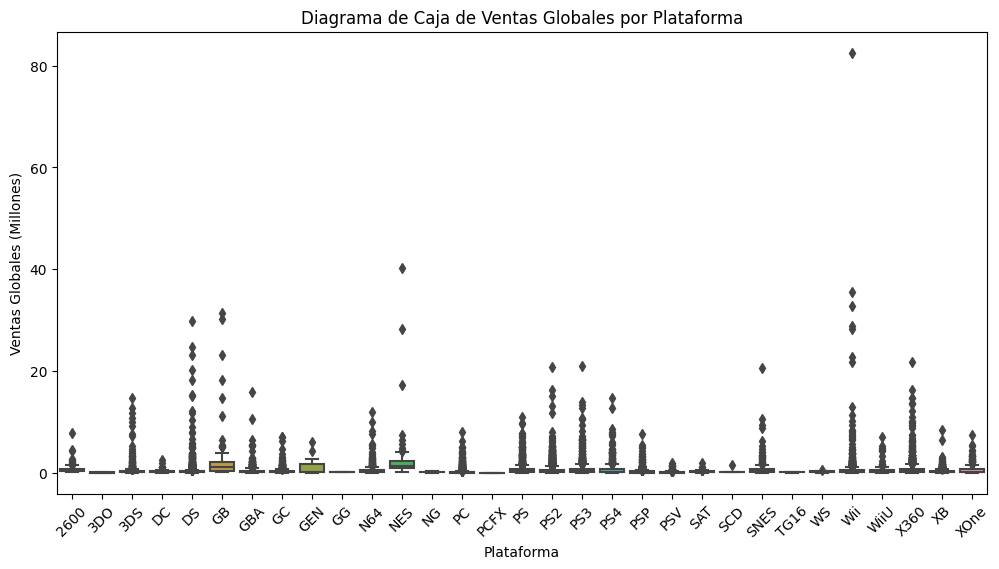

In [37]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_games)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (Millones)')
plt.xticks(rotation=45)
plt.show()

Análisis de Ventas Promedio
Finalmente, puedes calcular las ventas promedio por plataforma para tener una idea más clara de cómo se comparan:

In [38]:
# Calcular ventas promedio por plataforma
average_sales_by_platform = df_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:\n", average_sales_by_platform)

Ventas promedio por plataforma:
 platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64


Las ventas promedio por plataforma ayudara a comprender mejor cuál es más rentable o popular en términos de ingresos. Las plataformas con ventas promedio significativamente más altas pueden indicar un mejor desempeño en el mercado.

In [39]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [40]:
# Contar cuántas plataformas tiene cada juego
platform_counts = df_games.groupby('games_name')['platform'].nunique()
platform_counts

games_name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: platform, Length: 11559, dtype: int64

In [41]:
# Filtrar juegos que están en más de una plataforma
multiple_platforms_games = platform_counts[platform_counts > 1].index.tolist()
multiple_platforms_games

[" Frozen: Olaf's Quest",
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '11eyes: CrossOver',
 '18 Wheeler: American Pro Trucker',
 '187: Ride or Die',
 '2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe',
 '2002 FIFA World Cup',
 '2010 FIFA World Cup South Africa',
 '2014 FIFA World Cup Brazil',
 '25 to Life',
 '3rd Super Robot Wars Z Jigoku Hen',
 '3rd Super Robot Wars Z: Tengoku-Hen',
 '428: Fuusa Sareta Shibuya de',
 '4x4 EVO 2',
 '50 Cent: Blood on the Sand',
 '50 Cent: Bulletproof',
 '50 Classic Games',
 '7 Days to Die',
 '7 Wonders of the Ancient World',
 "A Bug's Life",
 'AC/DC LIVE: Rock Band Track Pack',
 'AKB1/149: Love Election',
 'AKB1/48: Idol to Guam de Koishitara...',
 'AMF Bowling Pinbusters!',
 'ATV Quad Kings',
 'ATV Quad Power Racing 2',
 'ATV: Quad Power Racing',
 'Abunai: Koi no Sousa Shitsu',
 'Accel World: Ginyoku no Kakusei',
 'Accel World: Kasoku no Chouten',
 'Ace Combat: Assault Horizon',
 'Activision Anthology',
 "Adventure Time: Expl

In [42]:
# Filtrar el dataframe para incluir solo esos juegos
df_multiple_platforms = df_games[df_games['games_name'].isin(multiple_platforms_games)]
df_multiple_platforms

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24,10.0600
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN,30.26,7.5650
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.2625
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,5.2025
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,71.0,7.5,NaN,20.62,5.1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16178,Egg Mania: Eggstreme Madness,XB,2002.0,Puzzle,0.01,0.00,0.00,0.00,58.0,7.5,E,0.01,0.0025
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,7.5,RP,0.01,0.0025
16182,Rocksmith 2014 Edition Remastered,XOne,2016.0,Misc,0.01,0.00,0.00,0.00,71.0,7.5,T,0.01,0.0025
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01,0.0025


In [43]:
# Calcular las ventas totales por juego y plataforma
sales_by_game_platform = df_multiple_platforms.groupby(['games_name', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index()
sales_by_game_platform

,games_name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Frozen: Olaf's Quest,2600,0.00,0.00,0.0,0.00,0.00
1,Frozen: Olaf's Quest,3DO,0.00,0.00,0.0,0.00,0.00
2,Frozen: Olaf's Quest,3DS,0.27,0.27,0.0,0.05,0.59
3,Frozen: Olaf's Quest,DC,0.00,0.00,0.0,0.00,0.00
4,Frozen: Olaf's Quest,DS,0.21,0.26,0.0,0.04,0.51
...,...,...,...,...,...,...,...
86950,uDraw Studio: Instant Artist,Wii,0.06,0.09,0.0,0.02,0.17
86951,uDraw Studio: Instant Artist,WiiU,0.00,0.00,0.0,0.00,0.00
86952,uDraw Studio: Instant Artist,X360,0.01,0.01,0.0,0.00,0.02
86953,uDraw Studio: Instant Artist,XB,0.00,0.00,0.0,0.00,0.00


In [44]:
# Calcular Ventas Totales por Género, Primero, debes agrupar los datos por género y sumar las ventas en todas las regiones.

In [45]:
# Calcular ventas totales por género
total_sales_by_genre = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

# Ordenar los géneros por ventas totales
total_sales_by_genre = total_sales_by_genre.sort_values('total_sales', ascending=False)
print(total_sales_by_genre)

              na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Action          879.01    519.13    161.43       184.60      1744.17
Sports          684.43    376.79    135.54       134.51      1331.27
Shooter         592.24    317.34     38.76       104.11      1052.45
Role-Playing    330.81    188.71    355.41        59.63       934.56
Platform        445.50    200.35    130.83        51.09       827.77
Misc            407.27    212.74    108.11        74.39       802.51
Racing          359.35    236.51     56.71        76.10       728.67
Fighting        223.36    100.33     87.48        36.36       447.53
Simulation      181.92    113.52     63.80        30.73       389.97
Puzzle          122.87     50.01     57.31        12.38       242.57
Adventure       105.26     63.54     52.30        16.49       237.59
Strategy         68.55     45.17     49.66        10.85       174.23


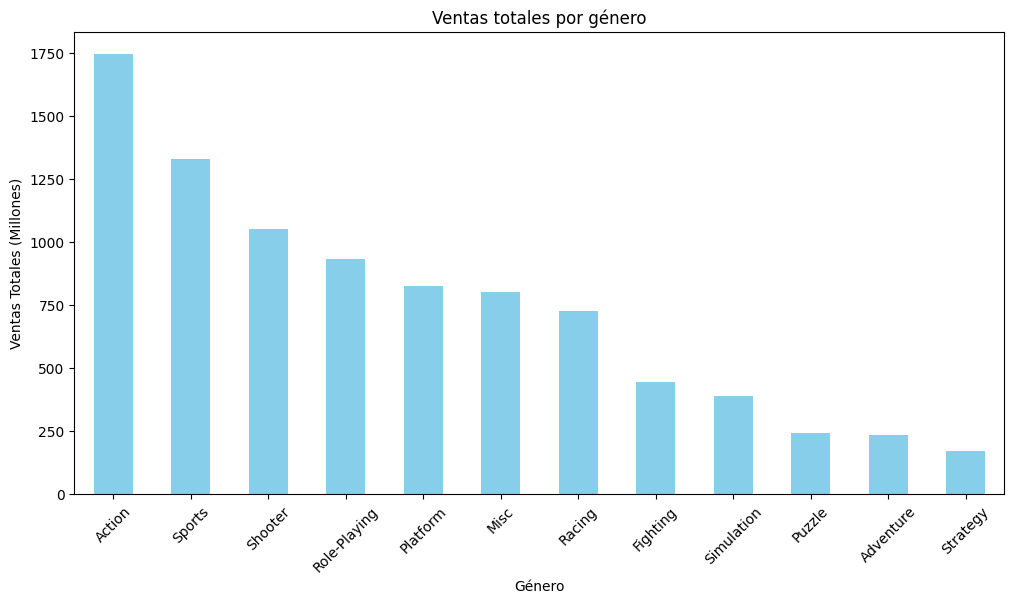

In [46]:
#Visualización de Ventas por Género
#Puedes visualizar las ventas totales por género utilizando un gráfico de barras para facilitar el análisis.

# Graficar ventas totales por género
plt.figure(figsize=(12, 6))
total_sales_by_genre['total_sales'].plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45)
plt.show()

**Análisis de Géneros de Ventas Altas y Bajas**

Identificar los géneros con ventas altas y bajas:

Géneros con ventas altas: Analiza cuántos juegos y qué plataformas están asociadas con estos géneros. Investiga si hay alguna tendencia particular en términos de gameplay o popularidad.

Géneros con ventas bajas: Del mismo modo, explora las razones detrás de sus ventas bajas. Pregúntate si estos géneros han sido más difíciles de monetizar, si han caído en popularidad, o si hay menos títulos lanzados en comparación con otros.

**Comparar Ventas Regionales**

También puedes observar cómo varían las ventas de diferentes géneros en distintas regiones. Esto puede ofrecerte información sobre las preferencias del consumidor en diferentes partes del mundo.

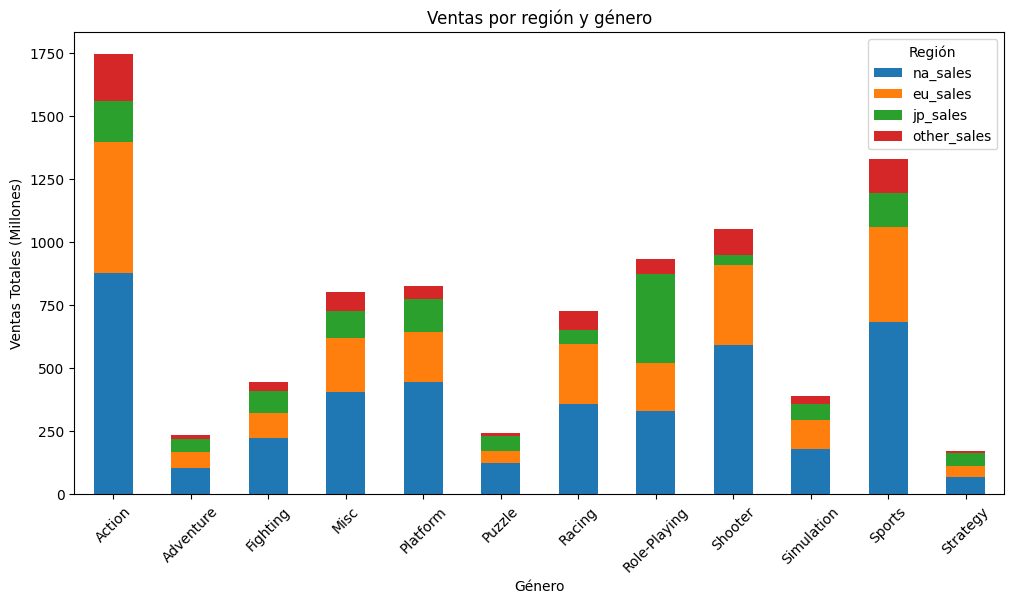

In [47]:
# Graficar ventas por región y género
sales_by_region_genre = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Graficar usando un gráfico de barras apiladas
sales_by_region_genre.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ventas por región y género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()

Resumen de Observaciones

Identificación de Tendencias: Generalizar sobre los géneros más y menos populares. Evalúar la relación entre la cantidad de títulos producidos y sus ventas.

Impacto en el Desarrollo de Juegos: Esta análisis puede influir en el desarrollo futuro de videojuegos y las decisiones de marketing.

Diferencias Regionales: Teniendo en cuenta las diferencias en las preferencias según la región, lo cual es crucial para desarrollar y comercializar videojuegos.

Este enfoque permitirá comprender mejor cómo las ventas se distribuyen entre los diferentes géneros en la industria de videojuegos. 

Calcular Rentabilidad por Género
Si dispones de información sobre los costos de desarrollo o producción por género, este será un factor clave para calcular la rentabilidad. Sin embargo, si solo tienes datos de ventas, puedes evaluar la rentabilidad en términos de ventas totales. Si no tienes costos, simplemente puedes analizar las ventas.

In [48]:
# Calcular cuántos títulos hay por género
titles_by_genre = df_games['genre'].value_counts()

# Combinar ventas y cantidad de títulos en un solo DataFrame para un análisis más completo
genre_analysis = pd.DataFrame({
    'total_sales': total_sales_by_genre['total_sales'],
    'title_count': titles_by_genre
})

# Calcular las ventas promedio por título
genre_analysis['avg_sales_per_title'] = genre_analysis['total_sales'] / genre_analysis['title_count']

# Ordenar por ventas promedio por título
genre_analysis = genre_analysis.sort_values('avg_sales_per_title', ascending=False)
print(genre_analysis)

              total_sales  title_count  avg_sales_per_title
Platform           827.77          888             0.932173
Shooter           1052.45         1323             0.795503
Role-Playing       934.56         1498             0.623872
Racing             728.67         1249             0.583403
Sports            1331.27         2348             0.566980
Fighting           447.53          849             0.527126
Action            1744.17         3369             0.517711
Misc               802.51         1750             0.458577
Simulation         389.97          873             0.446701
Puzzle             242.57          580             0.418224
Strategy           174.23          683             0.255095
Adventure          237.59         1303             0.182341


Resumen de Observaciones

Identificación de Géneros Rentables: Utilizar la información obtenida para identificar qué géneros son más rentables en términos de ventas totales y ventas promedio por título.

Recomendaciones de Mercado: Evalúar si ciertos géneros presentan un alto potencial de rentabilidad y considerar recomendar la inversión en esos géneros.

Tendencias a Largo Plazo: Si tenemos datos a través de los años, analizar cómo están cambiando las tendencias de rentabilidad por género a lo largo del tiempo.
Este enfoque te permitirá conocer qué géneros son más rentables en el conjunto de datos. 

In [49]:
# Calcular ventas totales por plataforma y región
platform_sales_by_region = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtener las cinco principales plataformas por región
top_platforms_na = platform_sales_by_region.nlargest(5, 'na_sales')
top_platforms_eu = platform_sales_by_region.nlargest(5, 'eu_sales')
top_platforms_jp = platform_sales_by_region.nlargest(5, 'jp_sales')

print("Top 5 plataformas en NA:\n", top_platforms_na)
print("Top 5 plataformas en UE:\n", top_platforms_eu)
print("Top 5 plataformas en JP:\n", top_platforms_jp)

Top 5 plataformas en NA:
           na_sales  eu_sales  jp_sales
platform                              
X360        602.47    270.76     12.43
PS2         583.84    339.29    139.20
Wii         496.90    262.21     69.33
PS3         393.49    330.29     80.19
DS          382.40    188.89    175.57
Top 5 plataformas en UE:
           na_sales  eu_sales  jp_sales
platform                              
PS2         583.84    339.29    139.20
PS3         393.49    330.29     80.19
X360        602.47    270.76     12.43
Wii         496.90    262.21     69.33
PS          336.52    213.61    139.82
Top 5 plataformas en JP:
           na_sales  eu_sales  jp_sales
platform                              
DS          382.40    188.89    175.57
PS          336.52    213.61    139.82
PS2         583.84    339.29    139.20
SNES         61.23     19.04    116.55
3DS          83.49     61.48    100.67


Variaciones en cuotas de mercado

Para analizar las variaciones en cuotas de mercado entre regiones, calcularemos las cuotas de mercado de las plataformas seleccionadas:

In [50]:
# Calcular cuotas de mercado
total_sales_na = platform_sales_by_region['na_sales'].sum()
total_sales_eu = platform_sales_by_region['eu_sales'].sum()
total_sales_jp = platform_sales_by_region['jp_sales'].sum()

platform_sales_by_region['na_market_share'] = platform_sales_by_region['na_sales'] / total_sales_na
platform_sales_by_region['eu_market_share'] = platform_sales_by_region['eu_sales'] / total_sales_eu
platform_sales_by_region['jp_market_share'] = platform_sales_by_region['jp_sales'] / total_sales_jp

# Mostrar cuotas de mercado
print(platform_sales_by_region[['na_market_share', 'eu_market_share', 'jp_market_share']])

          na_market_share  eu_market_share  jp_market_share
platform                                                   
2600             0.020580         0.002256         0.000000
3DO              0.000000         0.000000         0.000077
3DS              0.018965         0.025356         0.077595
DC               0.001233         0.000697         0.006598
DS               0.086863         0.077903         0.135328
GB               0.025968         0.019722         0.065610
GBA              0.042600         0.031035         0.036481
GC               0.030316         0.015965         0.016634
GEN              0.004782         0.002495         0.002081
GG               0.000000         0.000000         0.000031
N64              0.031579         0.016934         0.026376
NES              0.028607         0.008723         0.076038
NG               0.000000         0.000000         0.001110
PC               0.021473         0.058746         0.000131
PCFX             0.000000         0.0000

**Los cinco géneros principales por región**

Ahora calculamos las ventas totales por género para cada región y determinamos los cinco principales:

In [51]:
# Calcular ventas totales por género y región
genre_sales_by_region = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtener las cinco principales géneros por región
top_genres_na = genre_sales_by_region.nlargest(5, 'na_sales')
top_genres_eu = genre_sales_by_region.nlargest(5, 'eu_sales')
top_genres_jp = genre_sales_by_region.nlargest(5, 'jp_sales')

print("Top 5 géneros en NA:\n", top_genres_na)
print("Top 5 géneros en UE:\n", top_genres_eu)
print("Top 5 géneros en JP:\n", top_genres_jp)

Top 5 géneros en NA:
           na_sales  eu_sales  jp_sales
genre                                 
Action      879.01    519.13    161.43
Sports      684.43    376.79    135.54
Shooter     592.24    317.34     38.76
Platform    445.50    200.35    130.83
Misc        407.27    212.74    108.11
Top 5 géneros en UE:
          na_sales  eu_sales  jp_sales
genre                                
Action     879.01    519.13    161.43
Sports     684.43    376.79    135.54
Shooter    592.24    317.34     38.76
Racing     359.35    236.51     56.71
Misc       407.27    212.74    108.11
Top 5 géneros en JP:
               na_sales  eu_sales  jp_sales
genre                                     
Role-Playing    330.81    188.71    355.41
Action          879.01    519.13    161.43
Sports          684.43    376.79    135.54
Platform        445.50    200.35    130.83
Misc            407.27    212.74    108.11


Variaciones y Diferencias en Géneros

A partir de los resultados, observa las diferencias entre los géneros más vendidos en diferentes regiones. Por ejemplo:

Preferencias Regionales: Puedes notar que ciertos géneros son más populares en una región que en otra. Esto puede estar influenciado por factores culturales.

Tendencias de Competiciones: Puede que algunos géneros tengan más competencia en una región y, por lo tanto, su popularidad sea diferente.

Impacto de las Clasificaciones ESRB en las Ventas.

Para evaluar si las clasificaciones ESRB afectan a las ventas en regiones individuales, calcula las ventas totales por clasificación en cada región:

In [52]:
# Calcular ventas totales por clasificación ESRB y región

esrb_sales = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Mostrar las ventas por clasificación

print(esrb_sales)

        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


Grafica estas ventas para visualizar cómo las clasificaciones se relacionan con las ventas en diferentes regiones

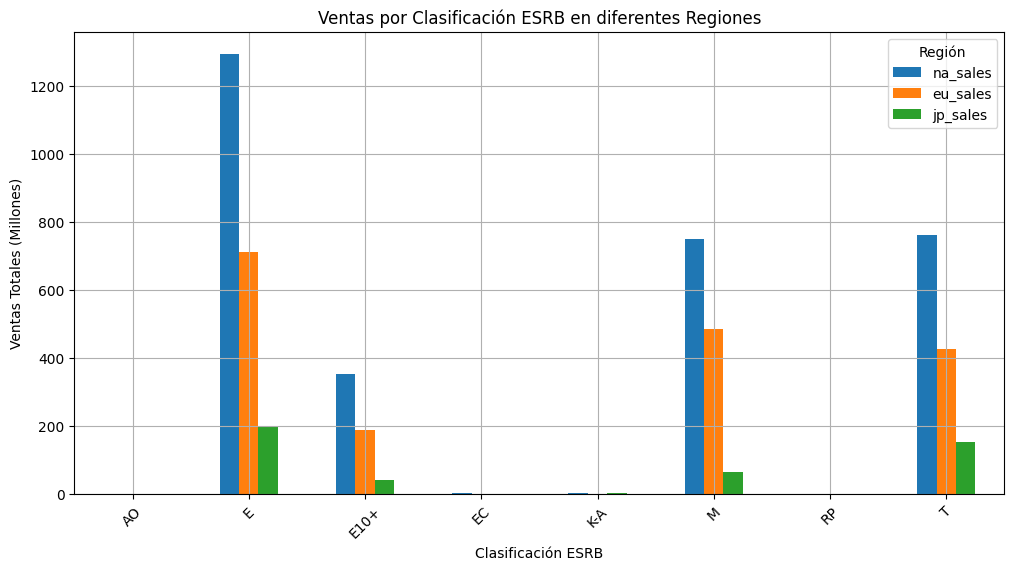

In [53]:
# Crear un gráfico de barras para visualizar las ventas por clasificación ESRB
esrb_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Clasificación ESRB en diferentes Regiones')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid()
plt.show()

Conclusiones
Plataformas y Géneros Principales: Las cinco plataformas y géneros principales proporcionarán información sobre qué elecciones hacen los consumidores en cada región. Las diferencias en la cuota de mercado pueden indicar regiones más competitivas para ciertos productos.

Variaciones en Preferencias: Las observaciones sobre diferentes géneros pueden ayudar a las empresas a adaptar sus estrategias de marketing y desarrollo a las preferencias locales.

Clasificaciones ESRB: Evaluar cómo influyen las clasificaciones ESRB en las ventas es fundamental para formular estrategias de lanzamiento y marketing. Un análisis que muestre un impacto positivo de ciertas clasificaciones en ventas podría llevar a un enfoque más centrado en esas cualidades en futuros lanzamientos.

#  Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [64]:
# Filtrar plataformas Xbox One y PC
xbox_one_scores = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()


In [65]:
levene_statistic, p_value_levene = stats.levene(xbox_one_scores, pc_scores)
alpha = 0.05

print(f'Prueba de Levene: Estadístico = {levene_statistic}, p-value = {p_value_levene}')

Prueba de Levene: Estadístico = 7.777487276478054e-05, p-value = 0.9929649852182456


In [66]:
if p_value_levene > alpha:
    print("No rechazamos la hipótesis nula de varianzas iguales.")
    equal_var = True  # Si no se rechaza, usamos True
else:
    print("Rechazamos la hipótesis nula de varianzas iguales.")
    equal_var = False  # Si se rechaza, usamos False

No rechazamos la hipótesis nula de varianzas iguales.


In [67]:
t_statistic, p_value_t = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

print(f'Prueba t: Estadístico = {t_statistic}, p-value = {p_value_t}')

Prueba t: Estadístico = -3.9004867777916257, p-value = 0.0001012395510719321


In [68]:
if p_value_t < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre Xbox One y PC.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre Xbox One y PC.")

Rechazamos la hipótesis nula: hay una diferencia significativa entre Xbox One y PC.


In [74]:
# Filtrar géneros de acción y deportes
action_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()


In [75]:
levene_statistic, p_value_levene = stats.levene(action_scores, sports_scores)
alpha = 0.05

print(f'Prueba de Levene: Estadístico = {levene_statistic}, p-value = {p_value_levene}')

Prueba de Levene: Estadístico = 0.1669962996816641, p-value = 0.6828105166182066


In [76]:
if p_value_levene > alpha:
    print("No rechazamos la hipótesis nula de varianzas iguales.")
    equal_var = True  # Si no se rechaza, usamos True
else:
    print("Rechazamos la hipótesis nula de varianzas iguales.")
    equal_var = False  # Si se rechaza, usamos False


No rechazamos la hipótesis nula de varianzas iguales.


In [77]:
t_statistic, p_value_t = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

print(f'Prueba t: Estadístico = {t_statistic}, p-value = {p_value_t}')

Prueba t: Estadístico = 0.3676581294613721, p-value = 0.7131417795320426


In [78]:
if p_value_t < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las calificaciones de Acción y Deportes.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre las calificaciones de Acción y Deportes.")

No rechazamos la hipótesis nula: no hay una diferencia significativa entre las calificaciones de Acción y Deportes.


#  Resumen

Se formularon hipótesis nula y alternativa, correspondientes a las comparaciones de las medias entre plataformas y géneros.

Criterio para la Prueba: Se utilizó una prueba t de Student como criterio para probar las hipótesis, basándose en su adecuación para comparar las medias de dos muestras independientes.
